In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys

sys.path.insert(0, '../algorithms')

import bf, csp, dlx

In [2]:
df = pd.read_csv('./NYTimes_Sudoku_Dataset.csv')

In [3]:
df.head(5)

,Date,Easy,Medium,Hard
0,01/06/21,"0,2,5,1,0,0,0,0,9,0,6,0,5,9,2,0,0,8,0,0,9,7,0,...","0,0,7,1,0,0,0,0,0,0,0,0,6,0,0,0,0,4,0,0,3,8,4,...","0,0,9,0,6,0,0,0,0,5,0,0,4,0,0,7,3,0,0,0,3,0,0,..."
1,02/06/21,"0,7,6,5,1,9,0,0,8,0,0,0,8,0,0,1,0,6,0,1,5,0,0,...","0,0,0,0,0,0,4,0,0,0,0,7,4,2,0,0,0,0,0,2,0,0,0,...","2,3,0,0,0,8,0,0,0,0,0,8,0,0,0,0,0,0,5,0,0,0,6,..."
2,03/06/21,"6,9,0,0,1,0,0,4,0,4,0,0,0,0,0,8,1,9,8,1,0,5,4,...","6,0,0,0,0,7,1,0,0,7,0,0,1,4,2,0,0,5,4,9,0,0,0,...","0,0,0,0,0,0,0,2,3,5,0,0,0,0,4,0,1,0,0,0,0,0,0,..."
3,04/06/21,"6,7,0,0,2,9,0,0,4,5,0,0,7,8,0,0,0,2,9,0,0,0,0,...","0,0,7,0,0,0,0,0,1,0,0,0,9,0,6,0,3,0,5,0,0,0,4,...","0,0,9,3,0,0,0,8,0,8,6,0,0,0,7,0,0,5,5,0,0,0,0,..."
4,05/06/21,"9,3,6,8,0,0,0,7,5,0,5,1,6,0,0,2,3,0,0,0,0,5,0,...","3,2,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,5,0,9,8,...","8,0,0,0,1,0,7,0,4,0,2,0,0,0,0,0,0,0,5,0,0,0,0,..."


In [4]:
def string_to_grid(s):
    return [list(ls) for ls in np.reshape([int(c) for c in s.split(',')], (9, 9))]

In [5]:
easy_unfilled_counts, medium_unfilled_counts, hard_unfilled_counts = [], [], []

for i in range(len(df['Easy'])):
    easy_unfilled_counts.append(df['Easy'][i].count('0'))
    medium_unfilled_counts.append(df['Medium'][i].count('0'))
    hard_unfilled_counts.append(df['Hard'][i].count('0'))

print('Easy   Average Unfilled Count: %.2f' % np.mean(easy_unfilled_counts))
print('Medium Average Unfilled Count: %.2f' % np.mean(medium_unfilled_counts))
print('Hard   Average Unfilled Count: %.2f' % np.mean(hard_unfilled_counts))

Easy   Average Unfilled Count: 43.00
Medium Average Unfilled Count: 57.06
Hard   Average Unfilled Count: 57.15


In [6]:
def compute_guesses(difficulty):
    bf_guesses, csp_guesses, dlx_guesses = [], [], []
    
    count = 0
    
    for s in df[difficulty]:
        grid = string_to_grid(s)
        
        bf_guesses.append(bf.SudokuBF(grid).solve()[1])
        csp_guesses.append(csp.SudokuCSP(grid).solve()[1])
        dlx_guesses.append(dlx.SudokuDLX(grid).solve()[1])
        
        count += 1
        
        print('Completed: %s #%d' % (difficulty, count))
    
    return bf_guesses, csp_guesses, dlx_guesses


In [7]:
easy_bf_guesses, easy_csp_guesses, easy_dlx_guesses = compute_guesses('Easy')
medium_bf_guesses, medium_csp_guesses, medium_dlx_guesses = compute_guesses('Medium')
hard_bf_guesses, hard_csp_guesses, hard_dlx_guesses = compute_guesses('Hard')

Completed: Easy #1
Completed: Easy #2
Completed: Easy #3
Completed: Easy #4
Completed: Easy #5
Completed: Easy #6
Completed: Easy #7
Completed: Easy #8
Completed: Easy #9
Completed: Easy #10
Completed: Easy #11
Completed: Easy #12
Completed: Easy #13
Completed: Easy #14
Completed: Easy #15
Completed: Easy #16
Completed: Easy #17
Completed: Easy #18
Completed: Easy #19
Completed: Easy #20
Completed: Easy #21
Completed: Easy #22
Completed: Easy #23
Completed: Easy #24
Completed: Easy #25
Completed: Easy #26
Completed: Easy #27
Completed: Easy #28
Completed: Easy #29
Completed: Easy #30
Completed: Easy #31
Completed: Easy #32
Completed: Easy #33
Completed: Easy #34
Completed: Easy #35
Completed: Easy #36
Completed: Easy #37
Completed: Easy #38
Completed: Easy #39
Completed: Easy #40
Completed: Easy #41
Completed: Easy #42
Completed: Easy #43
Completed: Easy #44
Completed: Easy #45
Completed: Easy #46
Completed: Easy #47
Completed: Easy #48
Completed: Easy #49
Completed: Easy #50
Completed

In [8]:
df_easy_guesses = pd.DataFrame(data = {'SB': easy_bf_guesses, 'CSP': easy_csp_guesses, 'DLX': easy_dlx_guesses})
df_medium_guesses = pd.DataFrame(data = {'SB': medium_bf_guesses, 'CSP': medium_csp_guesses, 'DLX': medium_dlx_guesses})
df_hard_guesses = pd.DataFrame(data = {'SB': hard_bf_guesses, 'CSP': hard_csp_guesses, 'DLX': hard_dlx_guesses})

In [9]:
sns.set_context('notebook', rc = {'axes.titlesize': 40, 'axes.labelsize': 30, 'axes.labelpad': 30, 'xtick.labelsize': 30, 'ytick.labelsize': 30})
sns.set_style('darkgrid')

Text(0, 0.5, 'Guesses')

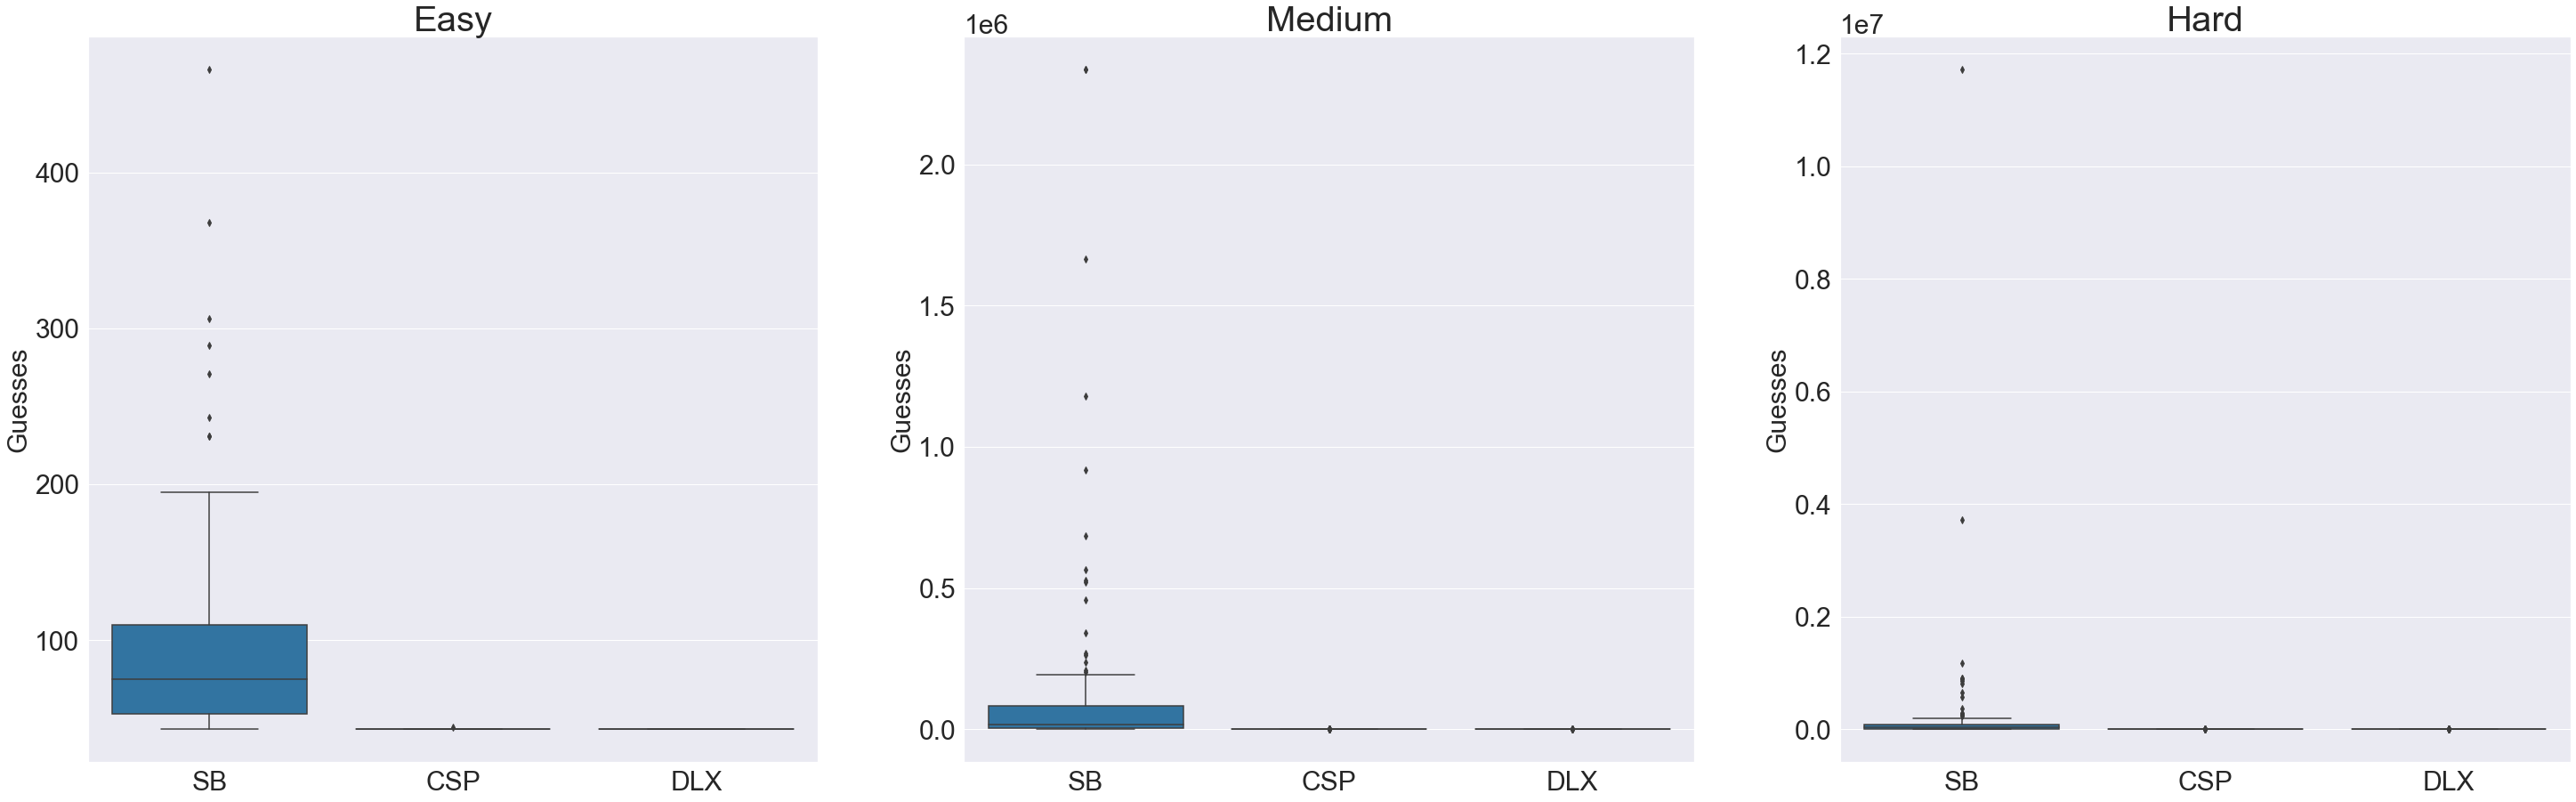

In [10]:
f, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (50, 15))

easy_plot = sns.boxplot(data = df_easy_guesses, ax = axes[0])
medium_plot = sns.boxplot(data = df_medium_guesses, ax = axes[1])
hard_plot = sns.boxplot(data = df_hard_guesses, ax = axes[2])

easy_plot.axes.set_title('Easy')
medium_plot.axes.set_title('Medium')
hard_plot.axes.set_title('Hard')

easy_plot.set_ylabel('Guesses')
medium_plot.set_ylabel('Guesses')
hard_plot.set_ylabel('Guesses')


Text(0, 0.5, 'Guesses')

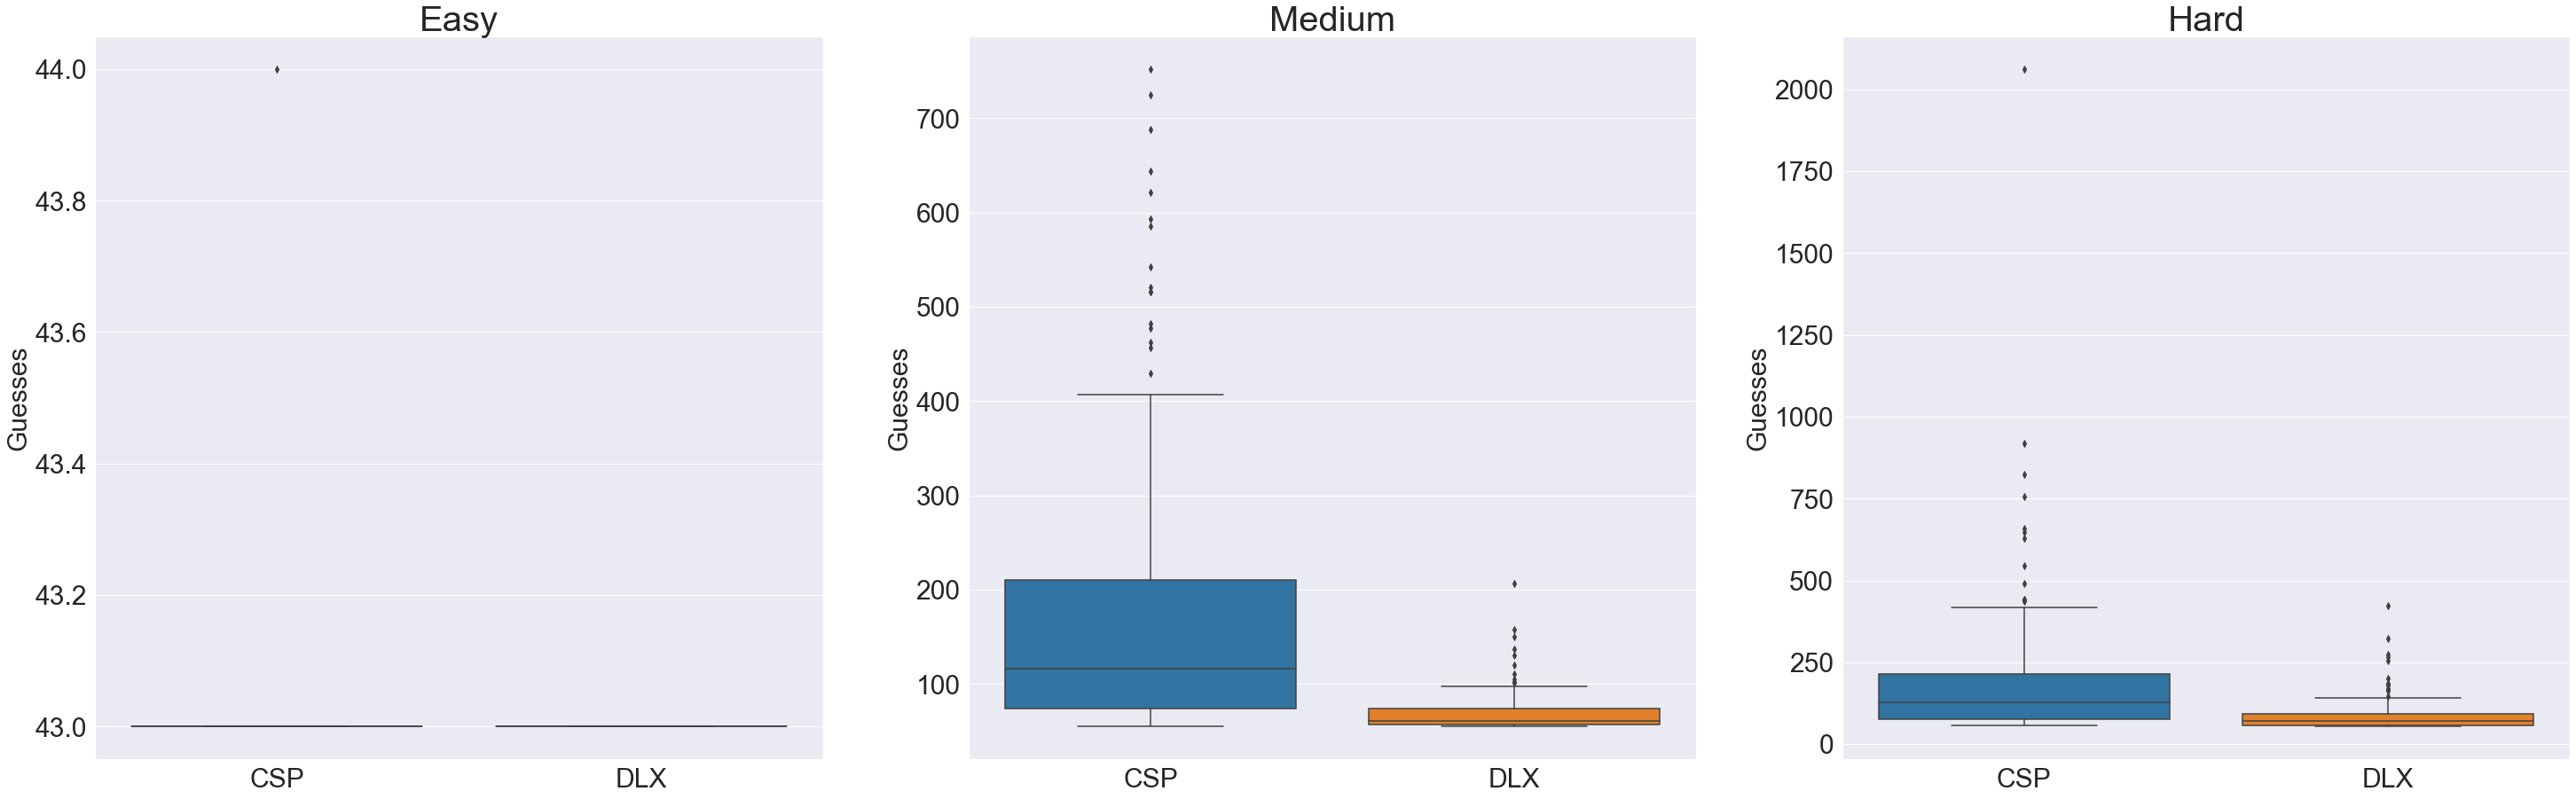

In [11]:
f, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (50, 15))

easy_plot = sns.boxplot(data = df_easy_guesses[['CSP', 'DLX']], ax = axes[0])
medium_plot = sns.boxplot(data = df_medium_guesses[['CSP', 'DLX']], ax = axes[1])
hard_plot = sns.boxplot(data = df_hard_guesses[['CSP', 'DLX']], ax = axes[2])

easy_plot.axes.set_title('Easy')
medium_plot.axes.set_title('Medium')
hard_plot.axes.set_title('Hard')

easy_plot.set_ylabel('Guesses')
medium_plot.set_ylabel('Guesses')
hard_plot.set_ylabel('Guesses')


In [12]:
print('Easy   BF  Average Guesses: %.2f' % np.mean(easy_bf_guesses))
print('Easy   CSP Average Guesses: %.2f' % np.mean(easy_csp_guesses))
print('Easy   DLX Average Guesses: %.2f' % np.mean(easy_dlx_guesses))
print('Medium BF  Average Guesses: %.2f' % np.mean(medium_bf_guesses))
print('Medium CSP Average Guesses: %.2f' % np.mean(medium_csp_guesses))
print('Medium DLX Average Guesses: %.2f' % np.mean(medium_dlx_guesses))
print('Hard   BF  Average Guesses: %.2f' % np.mean(hard_bf_guesses))
print('Hard   CSP Average Guesses: %.2f' % np.mean(hard_csp_guesses))
print('Hard   DLX Average Guesses: %.2f' % np.mean(hard_dlx_guesses))


Easy   BF  Average Guesses: 96.46
Easy   CSP Average Guesses: 43.01
Easy   DLX Average Guesses: 43.00
Medium BF  Average Guesses: 132818.38
Medium CSP Average Guesses: 186.59
Medium DLX Average Guesses: 69.95
Hard   BF  Average Guesses: 227502.38
Hard   CSP Average Guesses: 198.81
Hard   DLX Average Guesses: 91.71


In [13]:
grid = [
    [8, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 3, 6, 0, 0, 0, 0, 0],
    [0, 7, 0, 0, 9, 0, 2, 0, 0],
    [0, 5, 0, 0, 0, 7, 0, 0, 0],
    [0, 0, 0, 0, 4, 5, 7, 0, 0],
    [0, 0, 0, 1, 0, 0, 0, 3, 0],
    [0, 0, 1, 0, 0, 0, 0, 6, 8],
    [0, 0, 8, 5, 0, 0, 0, 1, 0],
    [0, 9, 0, 0, 0, 0, 4, 0, 0]
]

print('BF  Guesses: %d' % bf.SudokuBF(grid).solve()[1])
print('CSP Guesses: %d' % csp.SudokuCSP(grid).solve()[1])
print('DLX Guesses: %d' % dlx.SudokuDLX(grid).solve()[1])

BF  Guesses: 49558
CSP Guesses: 4051
DLX Guesses: 1471
